In [109]:
# Importing basic python packages
import numpy as np
import pandas as pd
#Importing packages used for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Importing packages used for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#from google.colab import drive

#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
#Importing dataset
#df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/BikeSharingAssignment/day.csv')
#Importing dataset
url = 'https://raw.githubusercontent.com/nagendran-84/Bike_Sharing_Assignment/main/day.csv'
df = pd.read_csv(url)

In [111]:
#Check the sample data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [112]:
#Check columns in Dataframe
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [113]:
#Check the dataframe rows and column count
df.shape

(730, 16)

In [114]:
#Check datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [115]:
#describe the dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [116]:
#Data cleaning process starts
#check if any null values exist
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [117]:
#check if any duplicate values exist
df.duplicated().sum()

0

In [118]:
#Selecting columns from dataframe df to df_Cleaned  which will be used for further analysis
df_Cleaned=df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
df_Cleaned.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [119]:
df_Cleaned.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


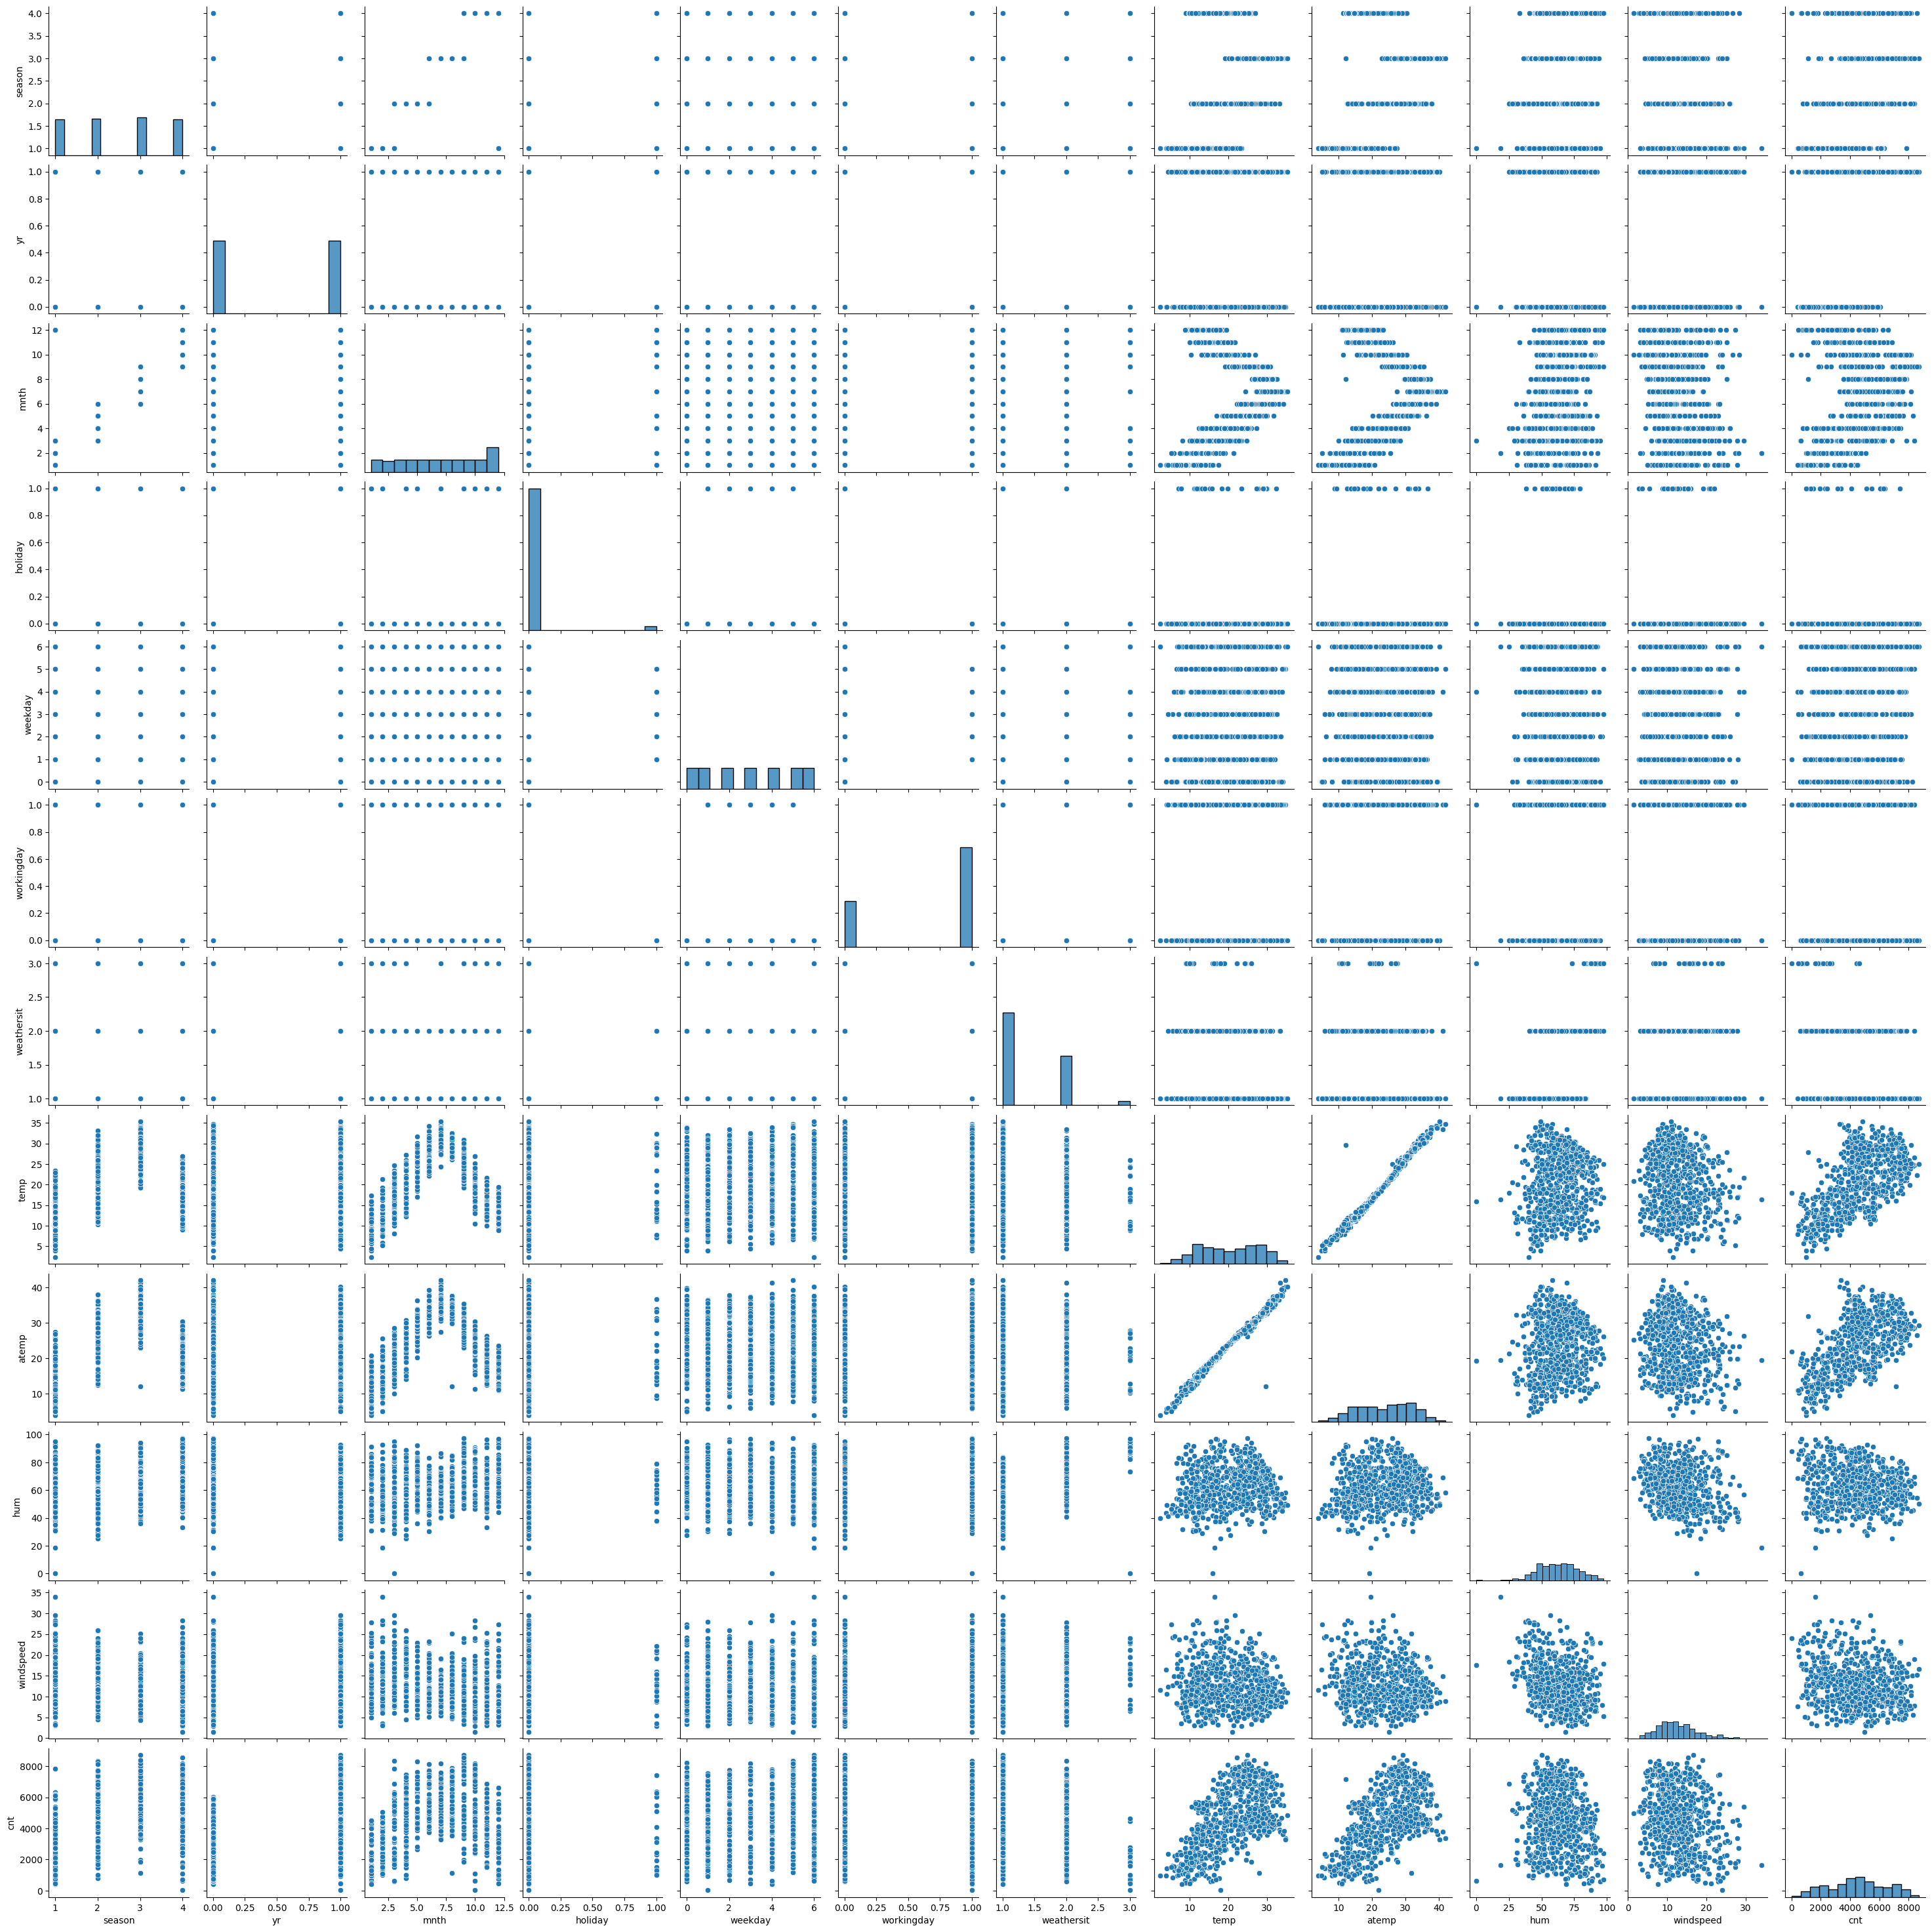

In [120]:
#visualising
#create a pairplot to check if any linear regerssion relation exists between the variables
sns.pairplot(df_Cleaned)

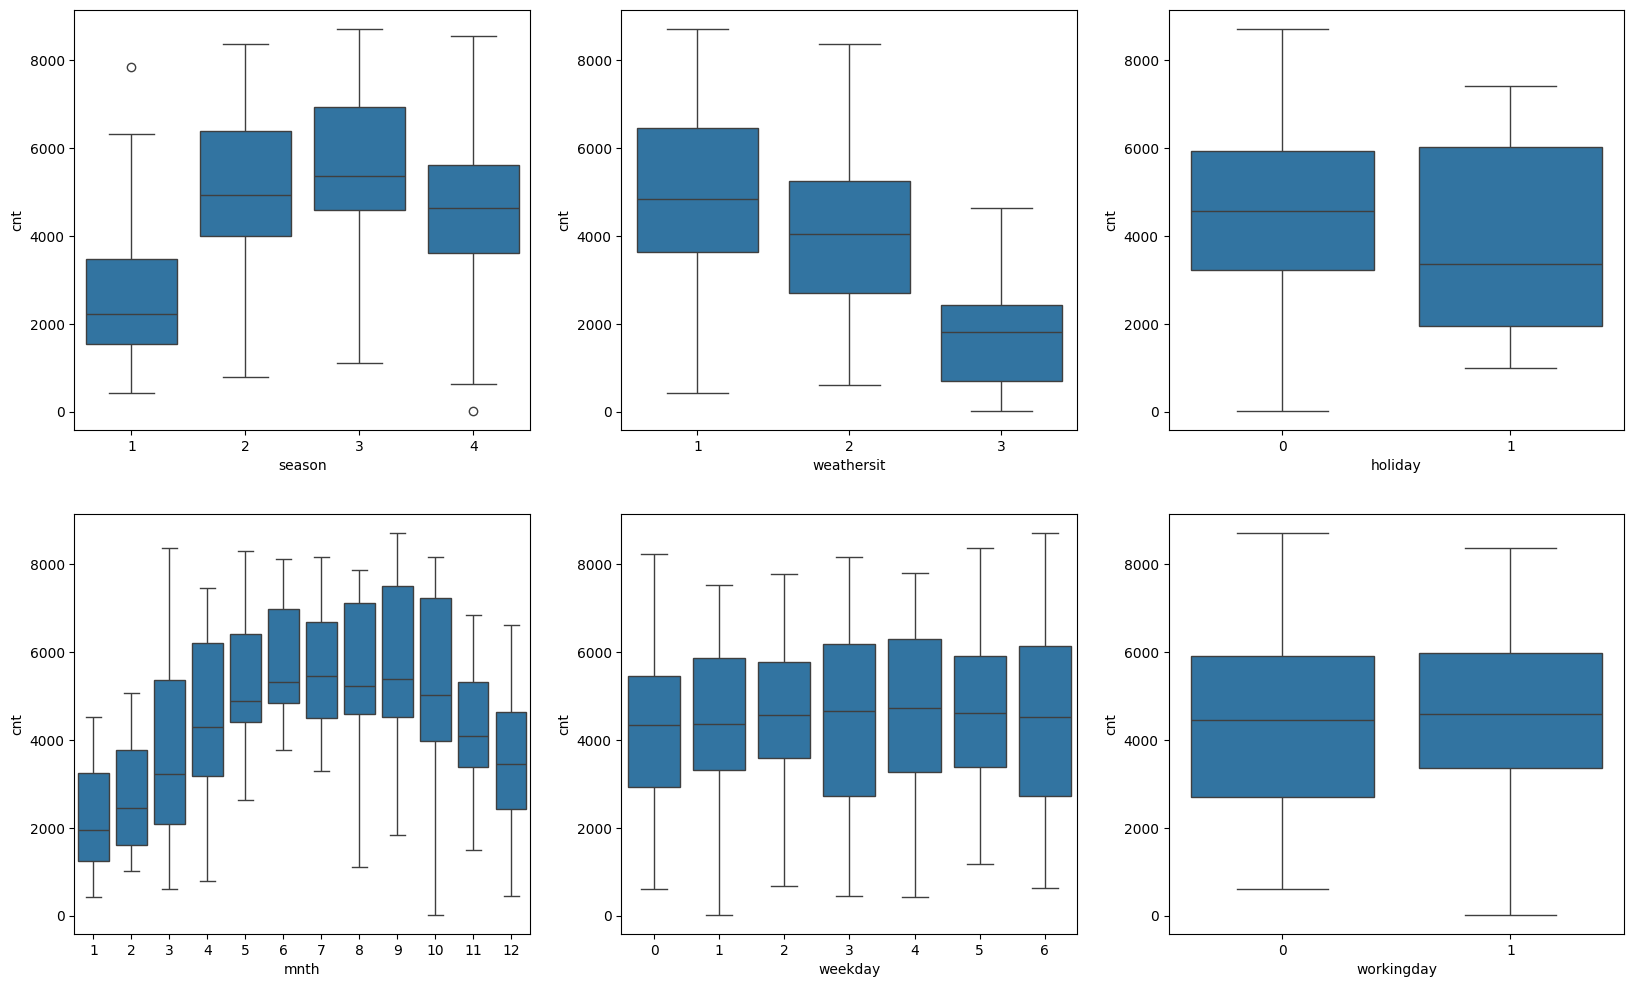

In [121]:
#visualising the categorial variables
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=df_Cleaned)

plt.subplot(2,3,2)
sns.boxplot(x='weathersit', y='cnt', data=df_Cleaned)

plt.subplot(2,3,3)
sns.boxplot(x='holiday', y='cnt', data=df_Cleaned)

plt.subplot(2,3,4)
sns.boxplot(x='mnth', y='cnt', data=df_Cleaned)

plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=df_Cleaned)

plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=df_Cleaned)


plt.show()

# Based on above plots, following are some inferences

1. Season plays major role in bike rents, fall season sees maximum bike rents. After that summer season saw next high.
2. So respective months of July,August and September shows same trend.
3. Weekend people like to take bike rides more
4. Weather during fall and summer are seems ideal for bike rides
5. Clear, Few clouds, Partly cloudy, Partly cloudy conditions improve bike rental numbers

# Data Preparation for model building

Adding dummy variables and adding categorical variables

In [122]:
df_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Converting categorical variables to boolean

In [123]:
df_Cleaned['season']=df_Cleaned['season'].astype('category')
df_Cleaned['weathersit']=df_Cleaned['weathersit'].astype('category')
df_Cleaned['mnth']=df_Cleaned['mnth'].astype('category')
df_Cleaned['weekday']=df_Cleaned['weekday'].astype('category')

<ipython-input-123-f886f44f29fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cleaned['season']=df_Cleaned['season'].astype('category')
<ipython-input-123-f886f44f29fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cleaned['weathersit']=df_Cleaned['weathersit'].astype('category')
<ipython-input-123-f886f44f29fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [124]:
df_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


Adding dummy variables and droping first one

In [125]:
df_Cleaned = pd.get_dummies(df_Cleaned, drop_first=True)
df_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    

# Prepare Dataset for training

In [126]:
#Split dataset into 70:30
df_cleaned_train, df_cleaned_test=train_test_split(df_Cleaned, train_size=0.7, random_state=333)

In [127]:
print(df_cleaned_train.shape)
print(df_cleaned_test.shape)

(510, 30)
(220, 30)


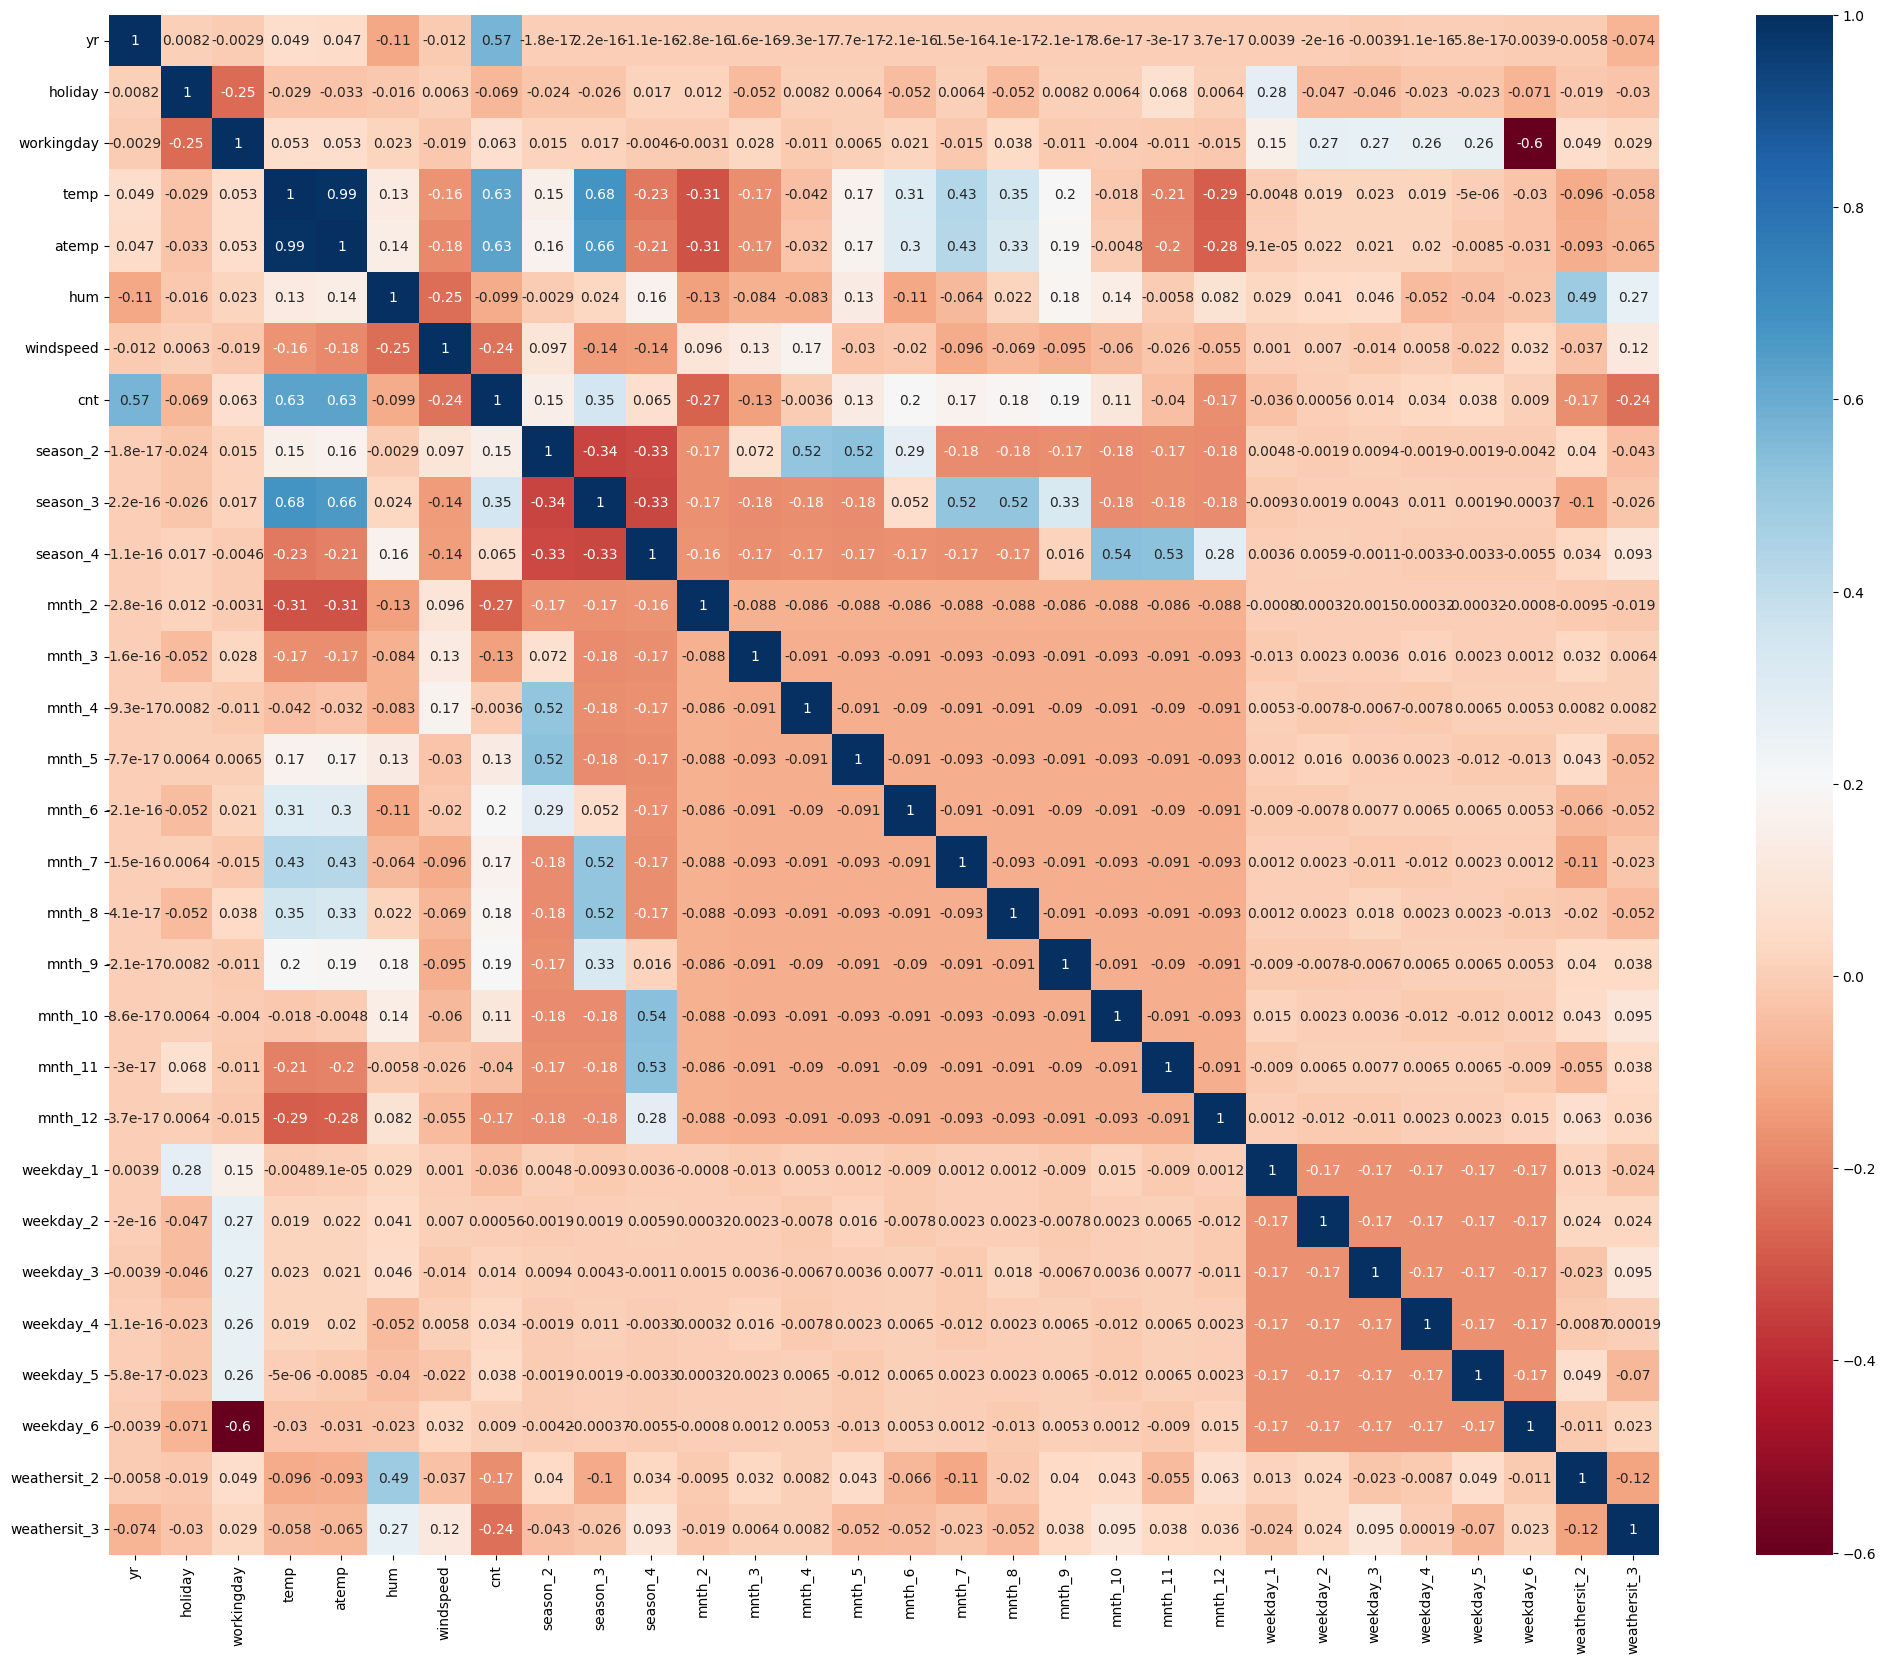

In [128]:
plt.figure(figsize = (25,20))
sns.heatmap(df_Cleaned.corr(), annot = True, cmap="RdBu")
plt.show()

Rescaling the Features

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Checking the values before scaling
df_cleaned_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,False,False,...,False,False,False,False,False,False,False,True,False,False
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,False,True,...,False,False,True,False,False,False,False,False,False,False
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,False,False,...,False,True,False,False,False,False,False,False,True,False
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,False,False,...,False,False,False,False,False,False,False,False,False,False
502,1,0,1,23.130847,27.55605,52.3333,9.166739,7639,True,False,...,False,False,False,False,False,False,True,False,False,False


In [130]:
num_var = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_cleaned_train[num_var] = scaler.fit_transform(df_cleaned_train[num_var])

In [131]:
df_cleaned_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,False,False,...,False,False,False,False,False,False,False,True,False,False
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,False,True,...,False,False,True,False,False,False,False,False,False,False
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,False,False,...,False,True,False,False,False,False,False,False,True,False
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,False,False,...,False,False,False,False,False,False,False,False,False,False
502,1,0,1,0.629300,0.619631,0.543723,0.235894,0.876323,True,False,...,False,False,False,False,False,False,True,False,False,False


In [132]:
df_cleaned_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.684314,0.540777,0.515530,0.647696,0.346806,0.514508
std,0.500487,0.151726,0.465245,0.227939,0.213652,0.149805,0.160182,0.224150
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.231105,0.359468
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646584,0.326920,0.516107
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.758008,0.434607,0.683473
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
#y_train = df_cleaned_train.pop('cnt')
#X_train = df_cleaned_train

X_train = df_cleaned_train.drop(['cnt'], axis=1)
y_train = df_cleaned_train['cnt']


In [134]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [135]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [136]:
# running RFE
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [137]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 14),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 15),
 ('mnth_5', False, 4),
 ('mnth_6', False, 10),
 ('mnth_7', False, 2),
 ('mnth_8', False, 13),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 5),
 ('mnth_12', False, 6),
 ('weekday_1', False, 3),
 ('weekday_2', False, 12),
 ('weekday_3', False, 8),
 ('weekday_4', False, 9),
 ('weekday_5', False, 7),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [138]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [139]:
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [140]:
X_train_rfe = X_train[col]

# MODEL - 1


In [141]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif


,Features,VIF
2,temp,383.99
3,atemp,362.65
4,hum,17.63
7,season_3,7.06
5,windspeed,4.72
1,workingday,4.65
6,season_2,3.50
8,season_4,3.00
13,weathersit_2,2.16
0,yr,2.03


In [142]:


import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1.astype(float)).fit()

In [143]:
# Check the parameters obtained

lr1.params

,0
const,0.194033
yr,0.228351
workingday,0.041578
temp,0.435856
atemp,0.057604
hum,-0.178591
windspeed,-0.183893
season_2,0.129556
season_3,0.079386
season_4,0.153721


In [144]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.28e-186
Time:                        04:12:42   Log-Likelihood:                 509.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     494   BIC:                            -919.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1940      0.030      6.526   

# MODEL - 2

In [145]:
#Removing the variable 'atemp' based on its High p-value & High VIF
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [146]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,23.20
3,hum,17.34
6,season_3,6.97
1,workingday,4.65
4,windspeed,4.56
5,season_2,3.50
7,season_4,2.99
12,weathersit_2,2.15
0,yr,2.03
11,weekday_6,1.80


In [147]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2.astype(float)).fit()
# Check the parameters obtained

lr2.params

,0
const,0.194883
yr,0.228339
workingday,0.041568
temp,0.490307
hum,-0.178010
windspeed,-0.186113
season_2,0.129658
season_3,0.078445
season_4,0.153959
mnth_3,0.047559


In [148]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.00e-187
Time:                        04:12:42   Log-Likelihood:                 509.46
No. Observations:                 510   AIC:                            -988.9
Df Residuals:                     495   BIC:                            -925.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1949      0.030      6.575   

# MODEL - 3

In [149]:
#Removing the variable 'hum' based on its Very High 'VIF' value
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [150]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.77
5,season_3,6.71
3,windspeed,4.28
1,workingday,4.14
4,season_2,3.48
6,season_4,2.88
0,yr,2.03
9,mnth_10,1.66
10,weekday_6,1.66
11,weathersit_2,1.54


In [151]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3.astype(float)).fit()
lr3.params

,0
const,0.090199
yr,0.232713
workingday,0.043200
temp,0.457488
windspeed,-0.147768
season_2,0.131389
season_3,0.087909
season_4,0.150587
mnth_3,0.055652
mnth_9,0.091362


In [152]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          4.73e-184
Time:                        04:12:42   Log-Likelihood:                 497.96
No. Observations:                 510   AIC:                            -967.9
Df Residuals:                     496   BIC:                            -908.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0902      0.020      4.422   

# MODEL - 4

In [153]:
#Removing the variable 'season_3' based on its Very High 'VIF' value.

X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [154]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.92
3,windspeed,4.15
1,workingday,4.10
0,yr,2.02
5,season_4,1.97
9,weekday_6,1.66
8,mnth_10,1.63
4,season_2,1.56
10,weathersit_2,1.54
7,mnth_9,1.23


In [155]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4.astype(float)).fit()
# Check the parameters obtained

lr4.params

,0
const,0.075145
yr,0.230752
workingday,0.043038
temp,0.569318
windspeed,-0.152269
season_2,0.083227
season_4,0.120268
mnth_3,0.044665
mnth_9,0.102902
mnth_10,0.041795


In [156]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.1
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.71e-181
Time:                        04:12:42   Log-Likelihood:                 489.12
No. Observations:                 510   AIC:                            -952.2
Df Residuals:                     497   BIC:                            -897.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0751      0.020      3.682   

# MODEL - 5

In [157]:
#Removing the variable 'mnth_10' based on its Very High p-value.
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)


In [158]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.80
3,windspeed,4.12
1,workingday,4.10
0,yr,2.01
8,weekday_6,1.66
4,season_2,1.56
9,weathersit_2,1.53
5,season_4,1.41
7,mnth_9,1.20
6,mnth_3,1.15


In [159]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5.astype(float)).fit()
# Check the parameters obtained

lr5.params

,0
const,0.072584
yr,0.229599
workingday,0.043123
temp,0.576592
windspeed,-0.155076
season_2,0.082063
season_4,0.135312
mnth_3,0.045370
mnth_9,0.096521
weekday_6,0.058412


In [160]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.51e-181
Time:                        04:12:42   Log-Likelihood:                 486.46
No. Observations:                 510   AIC:                            -948.9
Df Residuals:                     498   BIC:                            -898.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0726      0.020      3.547   

# MODEL - 6


In [161]:
#Removing the variable 'mnth_3' based on its High 'p-value'.
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [162]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.71
1,workingday,4.03
3,windspeed,4.03
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.55
8,weathersit_2,1.53
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


In [163]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6.astype(float)).fit()
# Check the parameters obtained

lr6.params

,0
const,0.082768
yr,0.230252
workingday,0.043963
temp,0.564438
windspeed,-0.154241
season_2,0.082300
season_4,0.129186
mnth_9,0.094832
weekday_6,0.057838
weathersit_2,-0.074921


In [164]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          4.48e-181
Time:                        04:12:42   Log-Likelihood:                 482.51
No. Observations:                 510   AIC:                            -943.0
Df Residuals:                     499   BIC:                            -896.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0828      0.020      4.083   

Insights
From the model 6 summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS

# Residual Analysis

  

<ipython-input-165-bd8bf9676550>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((res), bins = 20)


Text(0.5, 0, 'Errors')

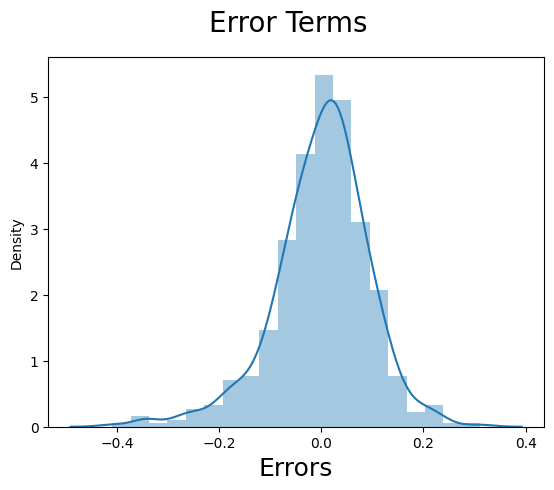

In [165]:
y_train_pred = lr6.predict(X_train_lm6)
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

From above histogram we could see that normal distribution on residuals

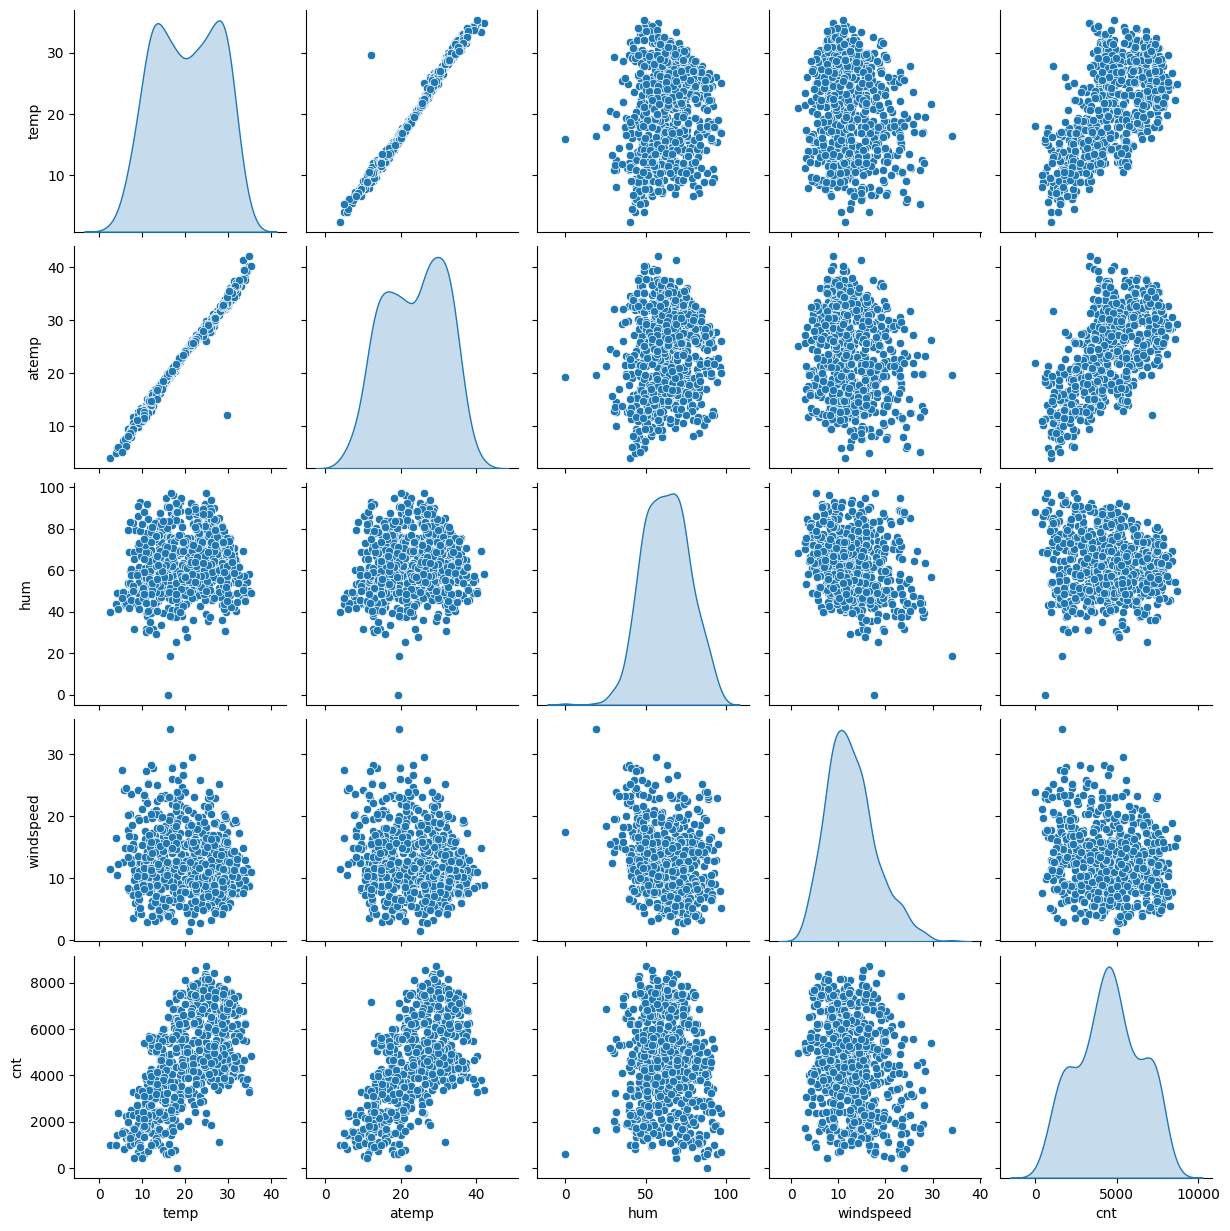

In [166]:
df_num=df_Cleaned[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()


In [167]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.71
1,workingday,4.03
3,windspeed,4.03
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.55
8,weathersit_2,1.53
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


# Final Prediction

In [168]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_cleaned_test[num_vars] = scaler.transform(df_cleaned_test[num_vars])
df_cleaned_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,False,False,...,False,False,False,False,False,False,False,False,False,False
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,True,False,...,False,False,False,False,False,False,False,True,False,False
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,False,True,...,False,False,False,False,False,False,False,False,False,False
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,True,False,...,False,False,False,False,False,False,False,False,False,False
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,False,False,...,False,True,False,True,False,False,False,False,True,False


In [169]:
df_cleaned_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,0.550981,0.527344,0.662328,0.346015,0.519816
std,0.501120,0.198531,0.466833,0.228967,0.214959,0.143278,0.159517,0.219880
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300


In [170]:
Y_test = df_cleaned_test.pop('cnt')
X_test = df_cleaned_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 22 to 483
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    bool   
 8   season_3      220 non-null    bool   
 9   season_4      220 non-null    bool   
 10  mnth_2        220 non-null    bool   
 11  mnth_3        220 non-null    bool   
 12  mnth_4        220 non-null    bool   
 13  mnth_5        220 non-null    bool   
 14  mnth_6        220 non-null    bool   
 15  mnth_7        220 non-null    bool   
 16  mnth_8        220 non-null    bool   
 17  mnth_9        220 non-null    bool   
 18  mnth_10       220 non-null    bool

In [171]:
#Preparing final model.

col1=X_train_new.columns
X_test=X_test[col1]

# Adding constant variable

X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 22 to 483
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    bool   
 6   season_4      220 non-null    bool   
 7   mnth_9        220 non-null    bool   
 8   weekday_6     220 non-null    bool   
 9   weathersit_2  220 non-null    bool   
 10  weathersit_3  220 non-null    bool   
dtypes: bool(6), float64(3), int64(2)
memory usage: 11.6 KB


In [172]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

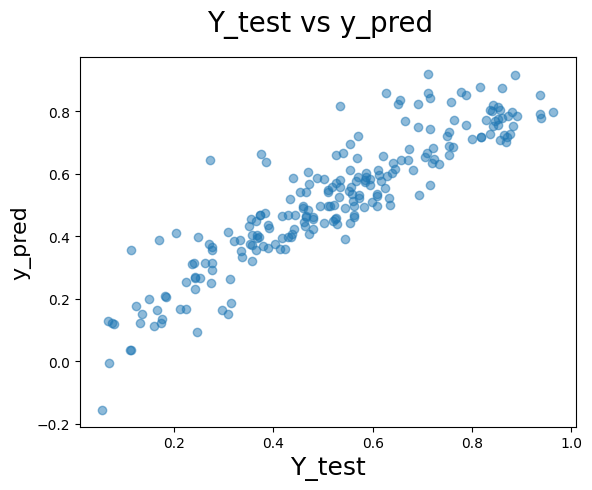

In [173]:
# Plotting y_test and y_pred to get the linear equation
fig = plt.figure()
plt.scatter(Y_test, y_pred, alpha=.5)
fig.suptitle('Y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('Y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()


In [174]:
#R2 value
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)



0.8205670075773203

In [175]:
# We already have the value of R^2 (calculated in above step)

r2=0.8203092200749708

In [176]:
# Get the shape of X_test
X_test.shape

(220, 10)

In [177]:
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8117115751024814

Final Conclusion

Train R^2 -- 0.8203092200749708
  
Train Adj R^2 -- 0.8117115751024814

Test R^2 -- 0.824

Test Adj R^2 -- 0.820




There are 3 predictor variables we are having from this dataset

  1. Temparature
  2. Weather SItuation
  3. Year

  In this weather situation is negative coefficient and it will influence the model results.
  